In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [3]:
# Handle missing values
data.dropna(inplace=True)

In [4]:
from scipy import stats
z_scores = np.abs(stats.zscore(data))
data = data[(z_scores < 3).all(axis=1)]

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

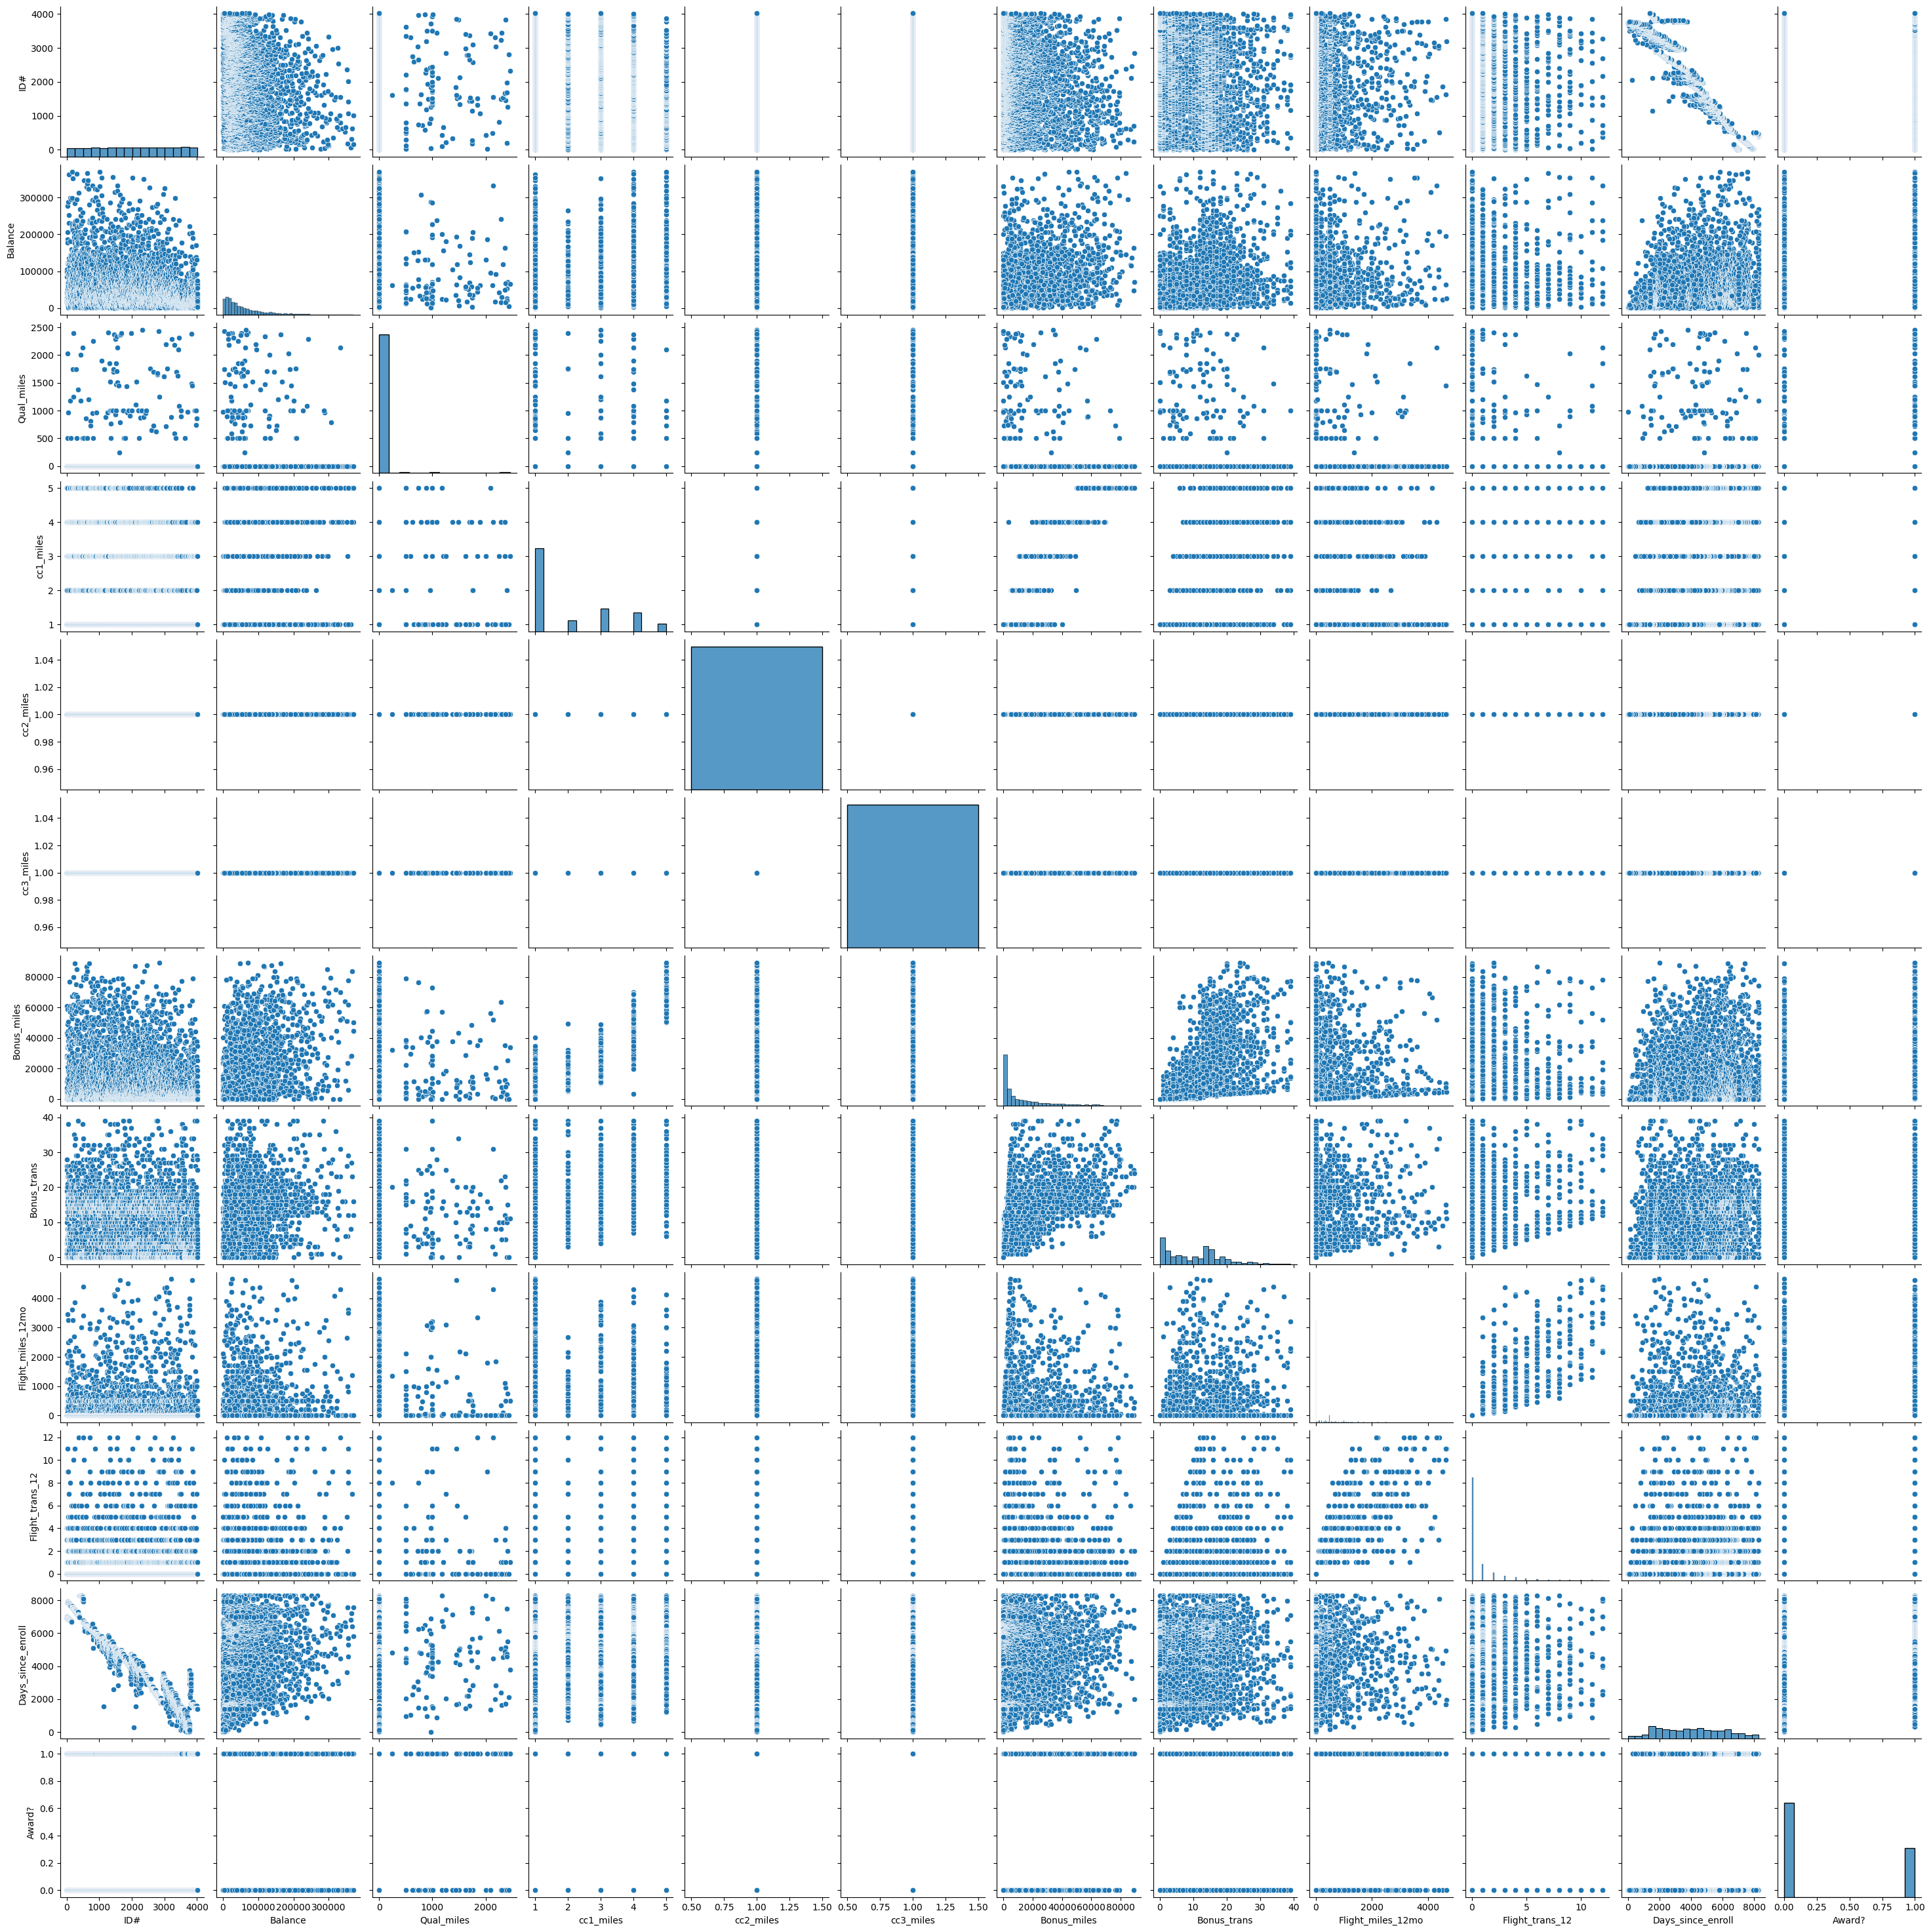

In [6]:
sns.pairplot(data)
plt.show()

Implementing Clustering Algorithms


In [7]:
# K-Means
# Find optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

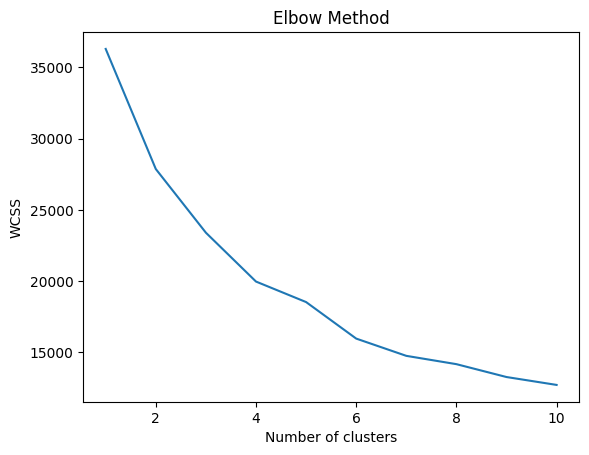

In [8]:
# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
kmeans_labels = kmeans.labels_

Hierarchical Clustering

In [10]:
agglomerative = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(scaled_data)

DBSCAN

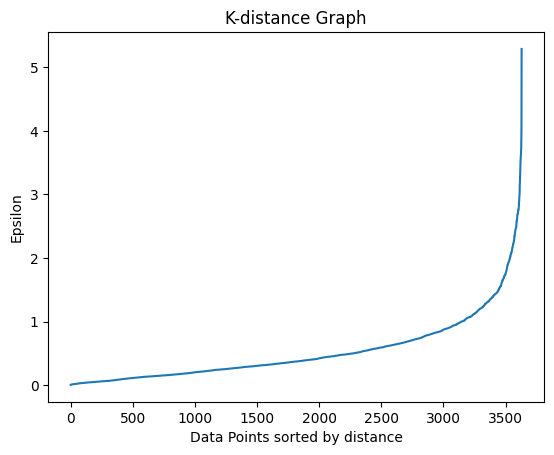

In [11]:
nn = NearestNeighbors(n_neighbors=2)
nn.fit(scaled_data)
distances, indices = nn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [12]:
epsilon = 0.5
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_labels

array([ 0,  0,  0, ..., -1, 24,  0])

Visualization

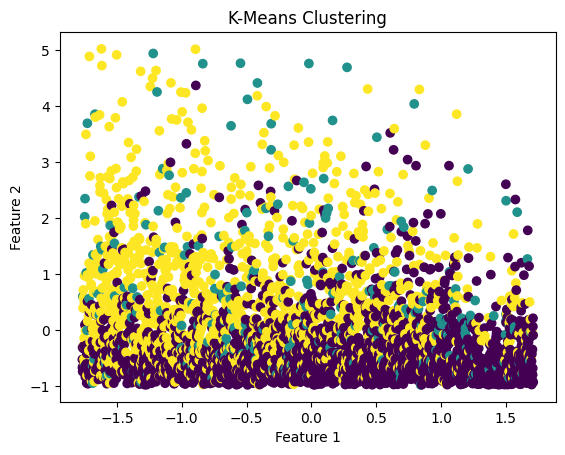

In [13]:
# Plot the clusters using scatter plot
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Evaluation and Performance Metrics

In [14]:
kmeans_silhouette_score = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

K-Means Silhouette Score: 0.29192710837860614


In [15]:
# Silhouette score for DBSCAN
dbscan_silhouette_score = silhouette_score(scaled_data, dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

DBSCAN Silhouette Score: -0.3994552312980999


In [16]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1} centroid:", centroid)

Cluster 1 centroid: [2.33231236e+03 3.65085034e+04 2.72704058e+01 1.18467852e+00
 1.00000000e+00 1.00000000e+00 3.96015504e+03 6.15731874e+00
 9.63447332e+01 3.44277246e-01 3.52870816e+03 1.86958504e-01]
Cluster 2 centroid: [1.92642629e+03 9.71697371e+04 1.59533865e+02 2.01593625e+00
 1.00000000e+00 1.00000000e+00 1.90856494e+04 1.59243028e+01
 2.18692430e+03 6.19123506e+00 4.32283267e+03 6.25498008e-01]
Cluster 3 centroid: [1.53312732e+03 9.71607445e+04 3.69688027e+01 3.49578415e+00
 1.00000000e+00 1.00000000e+00 3.24038010e+04 1.72723440e+01
 1.42278246e+02 4.56155143e-01 4.99229511e+03 5.63237774e-01]


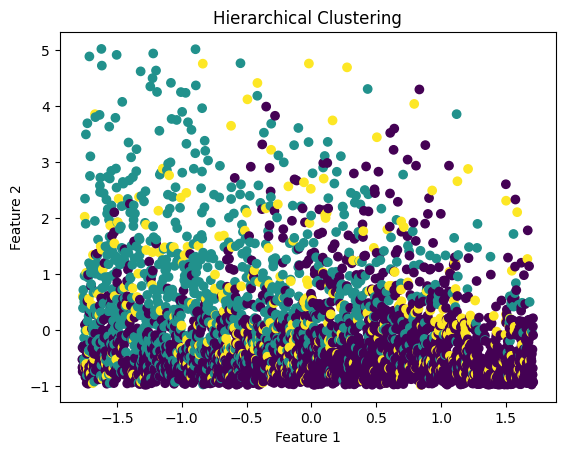

In [17]:
# Visualize hierarchical clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

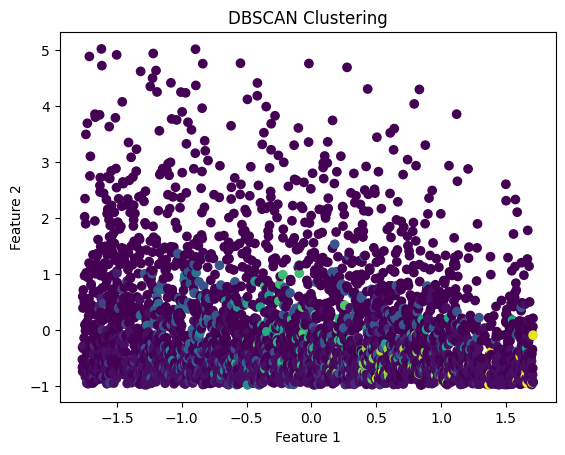

In [18]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [19]:
# Silhouette score for Hierarchical Clustering
agglomerative_silhouette_score = silhouette_score(scaled_data, agglomerative_labels)
print("Hierarchical Clustering Silhouette Score:", agglomerative_silhouette_score)

Hierarchical Clustering Silhouette Score: 0.26359050526851413
